In [2]:
import cloudmetrics
import numpy as np
import wradlib as wrl
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib as mpl
import glob
import cv2
import os
import shutil
import matplotlib.colors as mcolors
import math
import seaborn as sns
import re
import gc
import ctypes

In [3]:
def cartesianIdToCartesianCoor(gridIdIn):
    
    coordinates = np.empty(3, dtype=int) 
    
    timestep = 0
    while (gridIdIn-(1501*1501)) >= 0:
        timestep += 1
        gridIdIn -= (1501*1501)
    coordinates[0] = timestep
    
    x = 0
    while gridIdIn - 1501 >= 0:
        x += 1
        gridIdIn -= 1501
    coordinates[1] = x
    
    y = gridIdIn
    coordinates[2] = y
    return coordinates

def getFirstAndLastTimestepOfGraphs():
    directoryGraphComponents = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\GraphDateienNummeriertProcessed"
    for filename in os.listdir(directoryGraphComponents):

        path = directoryGraphComponents+"\\"+filename
        dataFromTxt = np.loadtxt(path, dtype=int)
        polarCoor = cartesianIdToCartesianCoor(dataFromTxt[0])
        firstT = polarCoor[0]
        polarCoor = cartesianIdToCartesianCoor(dataFromTxt[dataFromTxt.size-2])
        lastT = polarCoor[0]

        if firstT == 0 or lastT >= 287:
            print(filename)
            print("     FirstT: " + str(firstT))
            print("     LastT: " + str(lastT))

#getFirstAndLastTimestepOfGraphs()

graphNr0_20170603._component0_dbz25Interpol_1000.txt
     FirstT: 0
     LastT: 58
graphNr31_20170710._component14_dbz25Interpol_1000.txt
     FirstT: 274
     LastT: 287
graphNr39_20170730._component3_dbz25Interpol_1000.txt
     FirstT: 252
     LastT: 287
graphNr50_20170802._component7_dbz25Interpol_1000.txt
     FirstT: 251
     LastT: 287
graphNr51_20170802._component8_dbz25Interpol_1000.txt
     FirstT: 263
     LastT: 287


KeyboardInterrupt: 

In [4]:
def readInCluster(path):    
    dataFromTxt = np.genfromtxt(path, delimiter='\t', dtype=str)
    clusterMembers = []
    z = 0
    currCluster = 0
    for i in range(len(dataFromTxt)):
        clusterMembers.append([])
        for j in range(len(dataFromTxt[i].split())-1):
                
            clusterMembers[i].append(dataFromTxt[i].split()[j])
                
    return clusterMembers

In [5]:
def readInCloudmetricsForClusterMembers(clusterMembers):
    
    directoryCloudmetrics = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\cloudmetrics"
    cloudMetrics = []
    
    for i in range(len(clusterMembers)):
        cloudMetrics.append([])
        for j in range(len(clusterMembers[i])):
            cloudMetrics[i].append([])
            dataFromTxt = np.loadtxt(directoryCloudmetrics+"\\graphNr"+str(clusterMembers[i][j])+"_cloudmetrics.txt", dtype=float)
            for m in range(len(dataFromTxt)):
                cloudMetrics[i][j].append(dataFromTxt[m])
    
    return cloudMetrics

In [6]:
def bolxplotsForClusterMembers(cloudmetricsOnGraphs):
    nrMetrics = len(cloudmetricsOnGraphs[0][0])
    print("NrMetrics: " + str(nrMetrics))
    fig, ax = plt.subplots(nrows = 7, ncols = 1, figsize= (10,30))#(Breite,Höhe)
    p = 0
    for i in range(nrMetrics):
        if i != 4 and i != 7:
            cloudmetricsToPlot = []
            for k in range(len(cloudmetricsOnGraphs)):
                cloudmetricsToPlot.append([])  
                for j in range(len(cloudmetricsOnGraphs[k])):
                    cloudmetricsToPlot[k].append(cloudmetricsOnGraphs[k][j][i])
            #if i == 0:
                #print("in method")
                #print(cloudmetricsToPlot[3][:])
            plotData = []
            for z in range(len(cloudmetricsToPlot)):
                plotData.append(cloudmetricsToPlot[z])
            #bp = ax[p].boxplot([cloudmetricsToPlot[0][:],cloudmetricsToPlot[1][:], cloudmetricsToPlot[2][:], cloudmetricsToPlot[3][:], cloudmetricsToPlot[4][:]]) 
            bp = ax[p].boxplot(plotData) 
            p += 1
    ax[0].set_title("Wolkenanteil")
    ax[1].set_title("Fraktale Dimension")
    ax[2].set_title("IORG")
    ax[3].set_title("Maximale Längenskala")
    ax[4].set_title("Mittlere Längenskala")
    ax[5].set_title("Mittlerer Umfang")
    ax[6].set_title("SCAI")
    ax[0].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    ax[1].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    ax[2].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    ax[3].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    ax[4].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    ax[5].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    ax[6].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    # ax[0].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    # ax[1].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    # ax[2].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    # ax[0].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # ax[1].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # ax[2].set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # ax[0].set_xticklabels(['Cluster 1', 'Cluster 2'])
    # ax[1].set_xticklabels(['Cluster 1', 'Cluster 2'])
    # ax[2].set_xticklabels(['Cluster 1', 'Cluster 2'])
    plt.show()

In [12]:
def singleBoxplotsForClusterMembers(cloudmetricsOnGraphs, metricNr, metricBez):
    nrMetrics = len(cloudmetricsOnGraphs[0][0])
    print("NrMetrics: " + str(nrMetrics))
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (10,5))#(Breite,Höhe)
    p = 0
    for i in range(nrMetrics):
        if i == metricNr:
            cloudmetricsToPlot = []
            for k in range(len(cloudmetricsOnGraphs)):
                cloudmetricsToPlot.append([])  
                for j in range(len(cloudmetricsOnGraphs[k])):
                    cloudmetricsToPlot[k].append(cloudmetricsOnGraphs[k][j][i])
            #if i == 0:
                #print("in method")
                #print(cloudmetricsToPlot[3][:])
            plotData = []
            for z in range(len(cloudmetricsToPlot)):
                plotData.append(cloudmetricsToPlot[z])
            #bp = ax[p].boxplot([cloudmetricsToPlot[0][:],cloudmetricsToPlot[1][:], cloudmetricsToPlot[2][:], cloudmetricsToPlot[3][:], cloudmetricsToPlot[4][:]]) 
            bp = ax.boxplot(plotData) 
            p += 1
    ax.set_title(metricBez)
    ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
    plt.show()

In [8]:
def plotClusterZeitreihen(clusterMembers, attributNr, anzahlProCluster):
    directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
    i = 0
    j = 0
    plt.figure(figsize=(15, 9))
    colors = ['orange','blue','green','red','black','magenta']
    while i < len(clusterMembers):
        for filename in os.listdir(directory):
            f = os.path.join(directory, filename) 
            if i < len(clusterMembers) and "graphNr"+str(clusterMembers[i][j])+"_" in str(f) and attributNr in str(f):
                dataFromTxt = np.loadtxt(f, dtype=int)
                #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
                if 1 :
                    df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                    #print("gewählt i: "+str(i) + " j: "+str(j) + " GraphNr: " + str(clusterMembers[i][j]))
                    df['NrZhk'].plot(label='NrZhk', color=colors[i])
                j += 1
                if j == anzahlProCluster:
                    i += 1
                    j = 0

def subPlotClusterZeitreihen(clusterMembers, attributNr, anzahlProCluster, attributBezeichner):
    directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
    i = 0
    j = 0
    fig, ax = plt.subplots(len(clusterMembers),1,sharex='col',sharey='col',figsize=(10, 5))
    colors = ['orange','blue','green','red','black','magenta']
    while i < len(clusterMembers):
        for filename in os.listdir(directory):
            f = os.path.join(directory, filename) 
            if i < len(clusterMembers) and "graphNr"+str(clusterMembers[i][j])+"_" in str(f) and attributNr in str(f):
                dataFromTxt = np.loadtxt(f, dtype=int)
                #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
                if 1 :
                    df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                    #print("gewählt i: "+str(i) + " j: "+str(j) + " GraphNr: " + str(clusterMembers[i][j]))
                    df['NrZhk'].plot(label='NrZhk', color=colors[i], ax=ax[i])
                j += 1
                #if j == anzahlProCluster:
                if j == len(clusterMembers[i]):
                    i += 1
                    j = 0
    fig.suptitle(attributBezeichner)
    for i in range(len(clusterMembers)):
        ax[i].set_title("Cluster " + str(i+1))
        ax[i].tick_params(axis='both', which='both', labelbottom=True)


def subPlotGesamtClusterZeitreihen(clusterMembers):
    directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
    i = 0
    j = 0
    fig, ax = plt.subplots(15,1,figsize=(15, 30))
    ax[0].set_xlim([0, 300])              
    ax[0].set_ylim([0, 700])
    ax[3].set_xlim([0, 300])              
    ax[3].set_ylim([0, 700])
    #ax[0].set_xlim([-150000, 150000])              
    #ax[0].set_ylim([-150000, 150000])
    colors = ['orange','blue','green','red','black','magenta']
    a = 0
    while i < len(clusterMembers):
        for filename in os.listdir(directory):
            f = os.path.join(directory, filename) 
            if i < len(clusterMembers):
                if "graphNr"+str(clusterMembers[i][j])+"_" in str(f) and "attributNr0" in str(f):
                    dataFromTxt = np.loadtxt(f, dtype=int)
                    #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
                    df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                    attributNr = int(getAttributNr(filename))
                    #print("gewählt i: "+str(i) + " j: "+str(j) + " GraphNr: " + str(clusterMembers[i][j]) + " AttributNr: " + str(attributNr))
                    achse = (i*3)+attributNr
                    df['NrZhk'].plot(label='NrZhk', color=colors[i], ax=ax[achse])
                if "graphNr"+str(clusterMembers[i][j])+"_" in str(f) and "attributNr1" in str(f):
                    dataFromTxt = np.loadtxt(f, dtype=int)
                    #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
                    df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                    attributNr = int(getAttributNr(filename))
                    #print("gewählt i: "+str(i) + " j: "+str(j) + " GraphNr: " + str(clusterMembers[i][j]) + " AttributNr: " + str(attributNr))
                    achse = (i*3)+attributNr
                    df['NrZhk'].plot(label='NrZhk', color=colors[i], ax=ax[achse])
                if "graphNr"+str(clusterMembers[i][j])+"_" in str(f) and "attributNr2" in str(f):
                    dataFromTxt = np.loadtxt(f, dtype=int)
                    #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
                    df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
                    attributNr = int(getAttributNr(filename))
                    #print("gewählt i: "+str(i) + " j: "+str(j) + " GraphNr: " + str(clusterMembers[i][j]) + " AttributNr: " + str(attributNr))
                    achse = (i*3)+attributNr
                    df['NrZhk'].plot(label='NrZhk', color=colors[i], ax=ax[achse])
                    j += 1
                    #if j == anzahlProCluster:
                    if j == len(clusterMembers[i]):
                        i += 1
                        j = 0

NrMetrics: 9


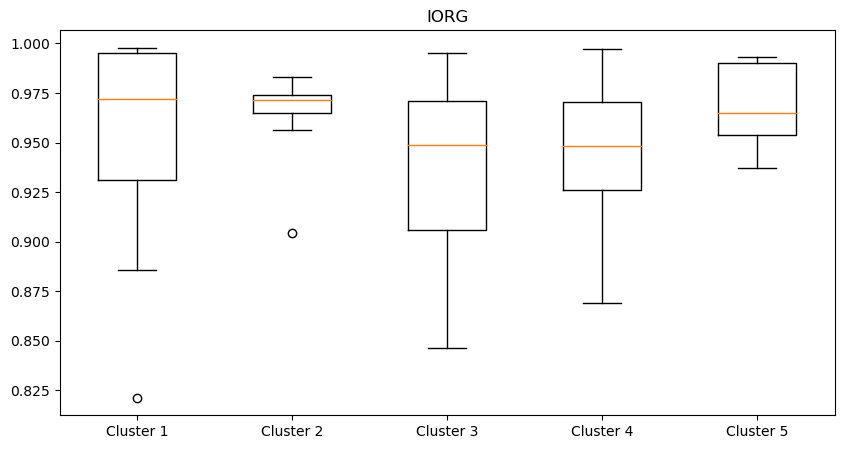

NrMetrics: 9


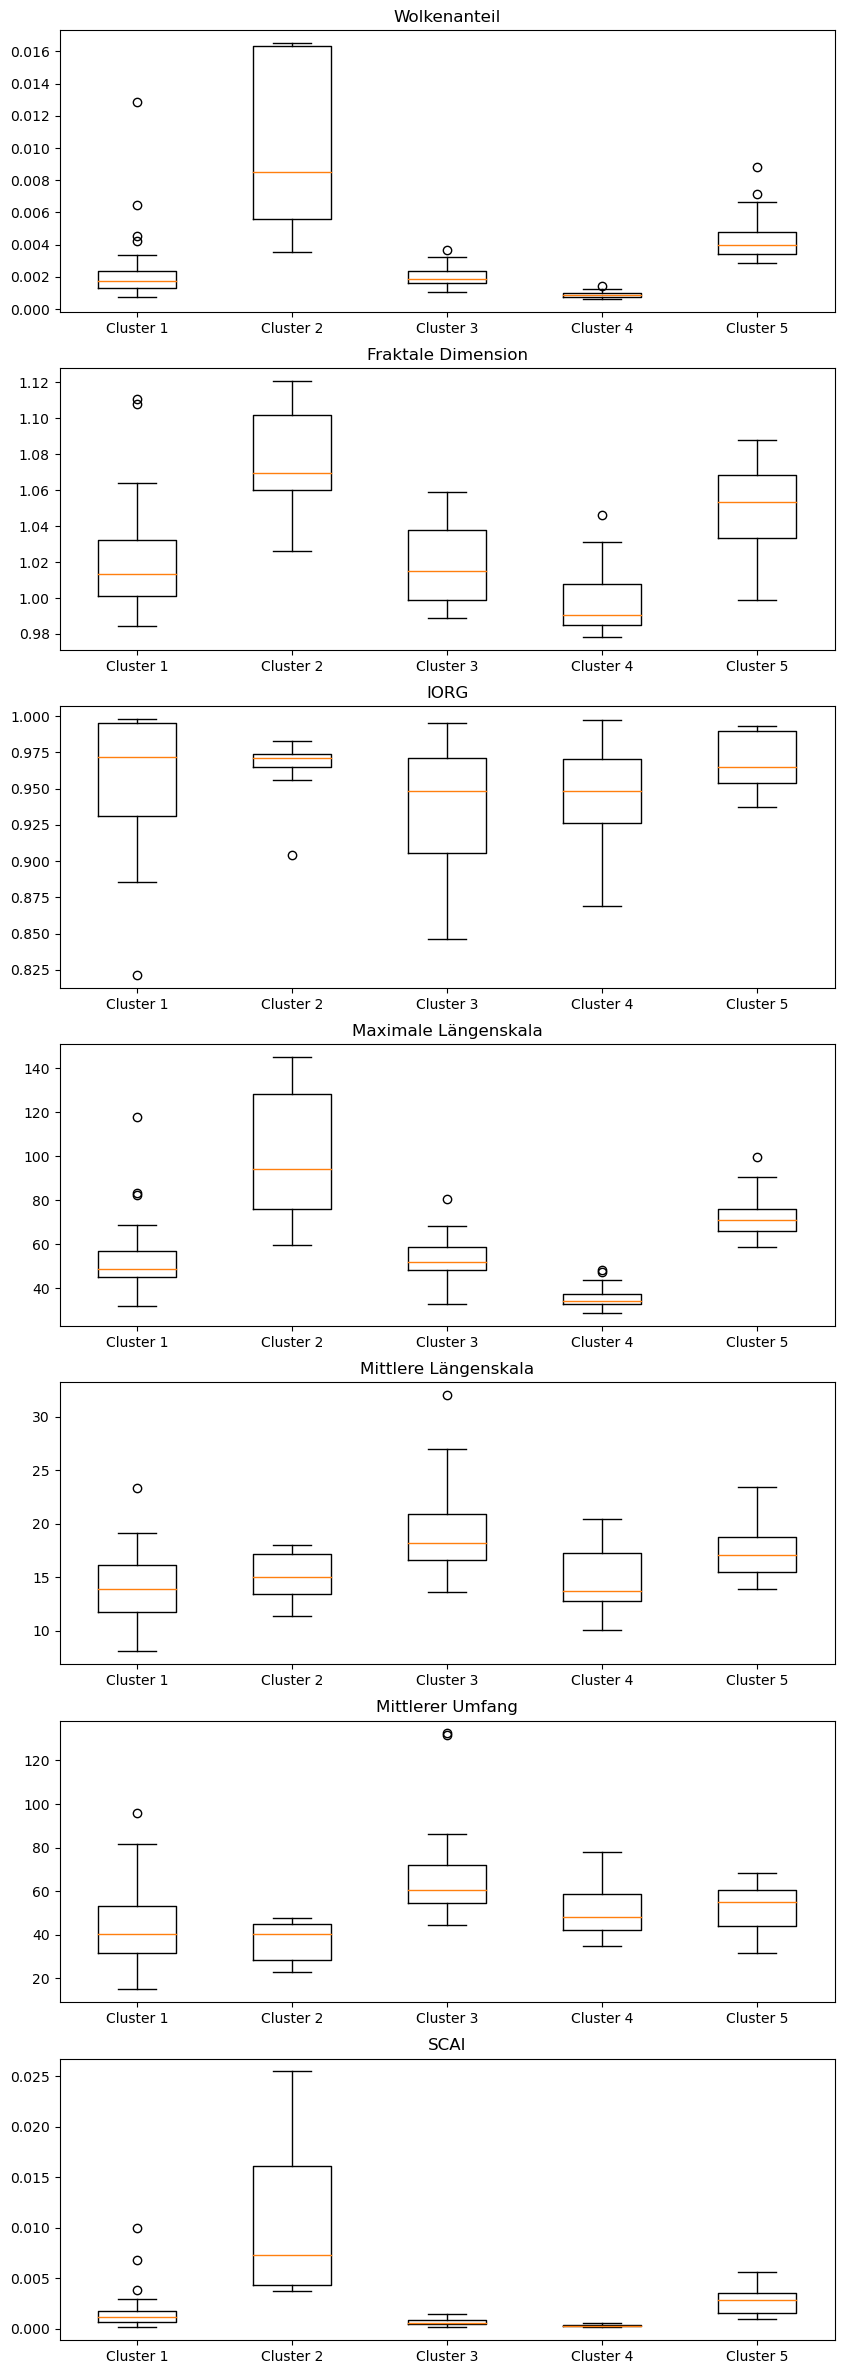

In [18]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\k_5_cluster_AttributeGesamt_dtw_2023-06-26_22-49-30.txt")
cloudmetricsOnGraphs = readInCloudmetricsForClusterMembers(clusterMembers)
singleBoxplotsForClusterMembers(cloudmetricsOnGraphs, 2, 'IORG')
bolxplotsForClusterMembers(cloudmetricsOnGraphs)

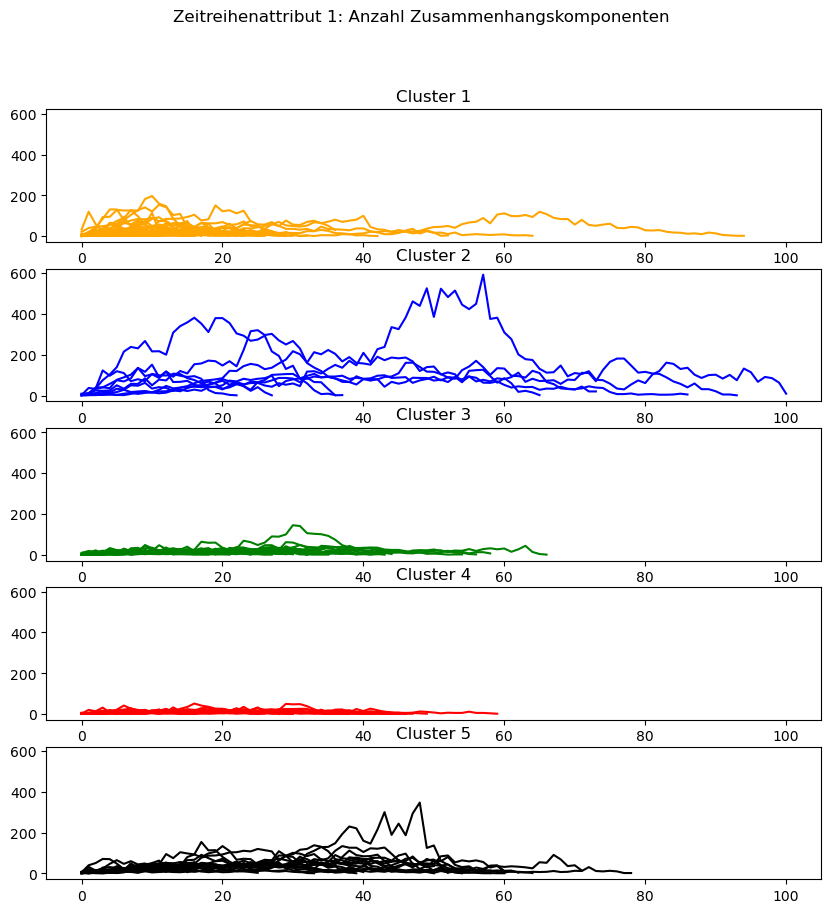

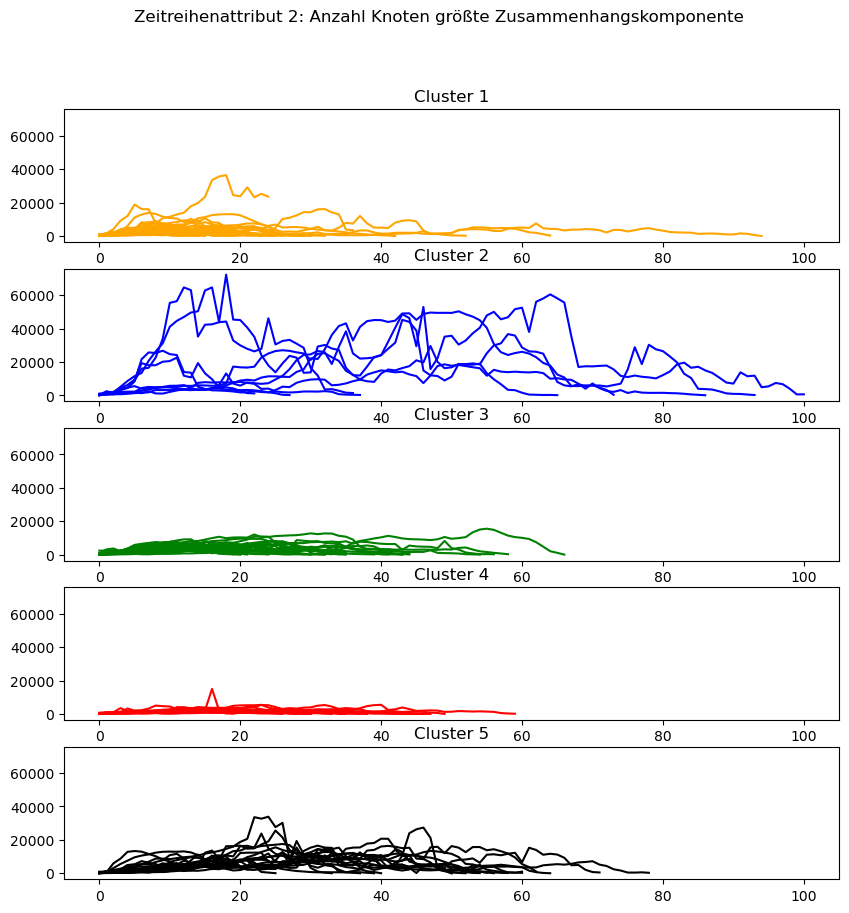

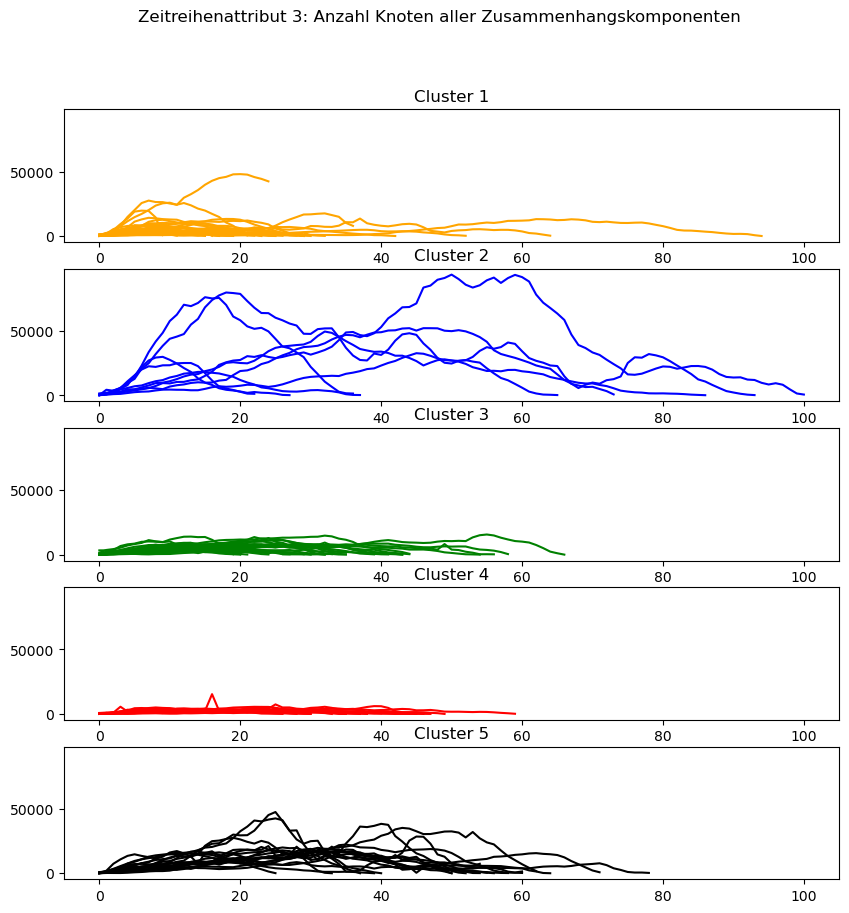

In [55]:
clusterMembers = readInCluster(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\k_5_cluster_AttributeGesamt_dtw_2023-06-26_22-49-30.txt")
subPlotClusterZeitreihen(clusterMembers,"attributNr0", 3, "Zeitreihenattribut 1: Anzahl Zusammenhangskomponenten")
subPlotClusterZeitreihen(clusterMembers,"attributNr1", 3, "Zeitreihenattribut 2: Anzahl Knoten größte Zusammenhangskomponente")
subPlotClusterZeitreihen(clusterMembers,"attributNr2", 3, "Zeitreihenattribut 3: Anzahl Knoten aller Zusammenhangskomponenten")

In [3]:
def readInCluster(path,nrCluster,nrMemeberCluster):    
    dataFromTxt = np.genfromtxt(path, delimiter='\t', dtype=str)
    clusterMembers = np.full((nrCluster, nrMemeberCluster), 0)
    z = 0
    currCluster = 0
    for i in range(nrCluster):
        for j in range(nrMemeberCluster):
                
            clusterMembers[i][j] = dataFromTxt[i].split()[j]
                
    return clusterMembers

In [ ]:
#for cartesian coordinates
def cartesianIdToCartesianCoor(gridIdIn):
    
    coordinates = np.empty(3, dtype=int) 
    
    timestep = 0
    while (gridIdIn-(1501*1501)) >= 0:
        timestep += 1
        gridIdIn -= (1501*1501)
    coordinates[0] = timestep
    
    x = 0
    while gridIdIn - 1501 >= 0:
        x += 1
        gridIdIn -= 1501
    coordinates[1] = x
    
    y = gridIdIn
    coordinates[2] = y
    return coordinates

def readInTxtFile(path):
    print("Read in text für Plotting routine")
    dataFromTxt = copy.deepcopy(np.loadtxt(path, dtype=int))
    dataArray = np.full((288, 1501, 1501), 0)
    print("dim array zero: " + str(dataArray.ndim))
    i = 0
    maxI = dataFromTxt.size
    firstTimestamp = 0
    lastTimestamp = 0
    print("size of txtFile " + str(maxI))
    while i < maxI:
        if(i%100000 == 0):
            print(i)
        polarCoor = cartesianIdToCartesianCoor(dataFromTxt[i])
        dataArray[polarCoor[0]][polarCoor[1]][polarCoor[2]] = 1
        if i == 0:
            print("FST")
            firstTimestamp = polarCoor[0]
        i += 2
        if i >= maxI:
            print("LST")
            lastTimestamp = polarCoor[0]
    print("dim array first: " + str(dataArray.ndim))
    print("first timestamp: " + str(firstTimestamp))
    print("last timestamp: " + str(lastTimestamp))
    del dataFromTxt
    gc.collect()
    return dataArray, firstTimestamp, lastTimestamp

def saveCloudmetricsOnGraphsToTxtFile(cloudmetricsOnGraphs, bezeichner):
    path = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\100GraphenGleichmClustering\cloudmetrics"
    with open(path+'\\'+bezeichner+'.txt', 'w') as f:
        for m in cloudmetricsOnGraphs:
            f.write(str(m) + ' ')
        f.close()


def calculateGraphMetricsForGraphs():
    
    directoryGraphComponents = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\GraphDateienNummeriert"
    targetDirectoryGraphComponents = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\GraphDateienNummeriertProcessed"
    i = 0
    for filename in os.listdir(directoryGraphComponents):

        cloudmetricsOnGraphs = np.full((9), 0.0)
        graphNr = re.findall(r'graphNr(\d{1,2})', str(filename))[0]
        print("calculate metrics for " + filename)
        print("graphNr: " + str(graphNr))
        graphMasks, firstT, lastT = readInTxtFile(directoryGraphComponents+"\\"+filename)
        metricZero = 0.0
        metricOne = 0.0
        #metricTwo = 0.0
        #metricThree = 0.0
        metricFour = 0.0
        metricFive = 0.0
        metricSix = 0.0
        metricSeven = 0.0
        metricEight = 0.0
        metricNine = 0.0
        metricTen = 0.0
        T = lastT-firstT+1
        print("first " + str(firstT) + " T " + str(T))
        for t in range(T):
            #auf graphMasks[t] metrics anwenden und speichern
            arr = graphMasks[t+firstT]
            metricZero += cloudmetrics.mask.cloud_fraction(arr)
            metricOne += cloudmetrics.mask.fractal_dimension(arr)
            #metricTwo += cloudmetrics.mask.orientation(arr)
            #metricThree += cloudmetrics.mask.objects.cop_objects(arr, periodic_domain=False)
            metricFour += cloudmetrics.mask.objects.iorg_objects(arr, periodic_domain=False)
            metricFive += cloudmetrics.mask.objects.max_object_length_scale(arr, periodic_domain=False)
            #metricFive += 0
            metricSix += cloudmetrics.mask.objects.mean_object_eccentricity(arr, periodic_domain=False)
            metricSeven += cloudmetrics.mask.objects.mean_object_length_scale(arr, periodic_domain=False)
            metricEight += cloudmetrics.mask.objects.mean_object_perimeter_length(arr, periodic_domain=False)
            metricNine += cloudmetrics.mask.objects.mean_object_length_scale(arr, periodic_domain=False)
            metricTen += cloudmetrics.mask.objects.scai_objects(arr, periodic_domain=False)
            del arr 
            gc.collect()
        cloudmetricsOnGraphs[0] = metricZero/T
        cloudmetricsOnGraphs[1] = metricOne/T
        #cloudmetricsOnGraphs[2] = metricTwo /T
        #cloudmetricsOnGraphs[3] = metricThree/T
        cloudmetricsOnGraphs[2] = metricFour/T
        cloudmetricsOnGraphs[3] = metricFive/T
        cloudmetricsOnGraphs[4] = metricSix/T
        cloudmetricsOnGraphs[5] = metricSeven/T
        cloudmetricsOnGraphs[6] = metricEight/T
        cloudmetricsOnGraphs[7] = metricNine/T
        cloudmetricsOnGraphs[8] = metricTen/T

        del graphMasks
        gc.collect()
        
        saveCloudmetricsOnGraphsToTxtFile(cloudmetricsOnGraphs, "graphNr"+str(graphNr)+"_cloudmetrics")
        shutil.move(directoryGraphComponents+"\\"+filename,targetDirectoryGraphComponents+"\\"+filename)


calculateGraphMetricsForGraphs()